In [ ]:
 from collections import deque
# https://leetcode.com/problems/number-of-islands/
# 200. Number of Islands
# class Solution:
#     def numIslands(self, grid: List[List[str]]) -> int:
#         if not grid or not grid[0]:
#             return 0

#         islands = 0
#         visit = set()
#         rows, cols = len(grid), len(grid[0])

#         def dfs(r, c):
#             if (
#                 r not in range(rows)
#                 or c not in range(cols)
#                 or grid[r][c] == "0"
#                 or (r, c) in visit
#             ):
#                 return

#             visit.add((r, c))
#             directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
#             for dr, dc in directions:
#                 dfs(r + dr, c + dc)

#         for r in range(rows):
#             for c in range(cols):
#                 if grid[r][c] == "1" and (r, c) not in visit:
#                     islands += 1
#                     dfs(r, c)
#         return islands



# BFS Version From Video
def numIslands(grid):
        if not grid:
            return 0

        rows, cols = len(grid), len(grid[0])
        visited=set()
        islands=0

        def bfs(r,c):
            q = deque()
            visited.add((r,c))
            q.append((r,c))

            while q:
                row,col = q.popleft()
                directions= [[1,0],[-1,0],[0,1],[0,-1]]

                for dr,dc in directions:
                    r,c = row + dr, col + dc
                    if (r) in range(rows) and (c) in range(cols) and grid[r][c] == '1' and (r ,c) not in visited:

                        q.append((r , c ))
                        visited.add((r, c ))

        for r in range(rows):
            for c in range(cols):

                if grid[r][c] == "1" and (r,c) not in visited:
                    bfs(r,c)
                    islands +=1

        return islands



grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
numIslands(grid )

1

In [ ]:
# https://leetcode.com/problems/clone-graph/
# 133. Clone Graph
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

from typing import Optional
class Solution:
    def cloneGraph(self, node: "Node") -> "Node":
        # old to new hashmap
        oldToNew = {}
        # dfs to noide
        def dfs(node):
            # base case
            if node in oldToNew:
                # return alreadyin mapo value
                return oldToNew[node]
        # create a copy of node
            copy = Node(node.val)
            # add to map
            oldToNew[node] = copy
            # for neighbers in node
            for nei in node.neighbors:
                # append the dfs to neighbours of the copy
                copy.neighbors.append(dfs(nei))
            # return copy
            return copy

        return dfs(node) if node else None


In [ ]:
# https://leetcode.com/problems/max-area-of-island/
# 695. Max Area of Island


def maxAreaOfIsland(grid):
        ROWS, COLS = len(grid), len(grid[0])
        visit = set()

        def dfs(r, c):
            if (
                r < 0
                or r == ROWS
                or c < 0
                or c == COLS
                or grid[r][c] == 0
                or (r, c) in visit
            ):
                return 0
            visit.add((r, c))
            return 1 + dfs(r + 1, c) + dfs(r - 1, c) + dfs(r, c + 1) + dfs(r, c - 1)

        area = 0
        for r in range(ROWS):
            for c in range(COLS):
                area = max(area, dfs(r, c))
        return area



grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
maxAreaOfIsland(grid)


6

In [ ]:
# https://leetcode.com/problems/pacific-atlantic-water-flow/
# 417. Pacific Atlantic Water Flow


def pacificAtlantic(heights) :
        ROWS, COLS = len(heights), len(heights[0])
        pac, atl = set(), set()

        def dfs(r, c, visit, prevHeight):
            if (
                (r, c) in visit
                or r < 0
                or c < 0
                or r == ROWS
                or c == COLS
                # we are going from ocean to node,so we should be having increasing height
                or heights[r][c] < prevHeight
            ):
                return
            visit.add((r, c))
            dfs(r + 1, c, visit, heights[r][c])
            dfs(r - 1, c, visit, heights[r][c])
            dfs(r, c + 1, visit, heights[r][c])
            dfs(r, c - 1, visit, heights[r][c])
        # going through columns
        for c in range(COLS):
            # first row close to pacific
            dfs(0, c, pac, heights[0][c])
            # last row close to atlantic
            dfs(ROWS - 1, c, atl, heights[ROWS - 1][c])
            # going through rows
        for r in range(ROWS):
            # first col close to pac
            dfs(r, 0, pac, heights[r][0])
            # last column close to atlantic
            dfs(r, COLS - 1, atl, heights[r][COLS - 1])

        res = []
        # go through each positions
        for r in range(ROWS):
            for c in range(COLS):
                # add to result if in both atl and pacific
                if (r, c) in pac and (r, c) in atl:
                    res.append([r, c])
        return res

#o(m*n) o(m*n)

heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
pacificAtlantic(heights)

[[0, 4], [1, 3], [1, 4], [2, 2], [3, 0], [3, 1], [4, 0]]

In [ ]:
# https://leetcode.com/problems/surrounded-regions/
# 130. Surrounded Regions


def solve(board):
        # reverse thinking
        # instead of finding surrounded region
        # we will find everything except unsurrounded regions


        ROWS, COLS = len(board), len(board[0])

        def capture(r, c):
            # base case borad is not 0, then return
            if r < 0 or c < 0 or r == ROWS or c == COLS or board[r][c] != "O":
                return
            # change to t is zero
            board[r][c] = "T"
            capture(r + 1, c)
            capture(r - 1, c)
            capture(r, c + 1)
            capture(r, c - 1)

        # 1. (DFS) Capture unsurrounded regions (O -> T)
        for r in range(ROWS):
            for c in range(COLS):
                # check border regions
                # if r in in range o 0 to rows - 1
                # same for columns
                if board[r][c] == "O" and (r in [0, ROWS - 1] or c in [0, COLS - 1]):
                    capture(r, c)

        # 2. Capture surrounded regions (O -> X)
        for r in range(ROWS):
            for c in range(COLS):
                if board[r][c] == "O":
                    board[r][c] = "X"

        # 3. Uncapture unsurrounded regions (T -> O)
        for r in range(ROWS):
            for c in range(COLS):
                if board[r][c] == "T":
                    board[r][c] = "O"
        return board

#o(n*m) o(1)
board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
solve(board)

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

In [ ]:
# https://leetcode.com/problems/rotting-oranges/description/
import collections

def orangesRotting(grid):
        # bfs
        q = collections.deque()
        fresh = 0
        time = 0
# get the count of fresh oranges and append rotten to the quewue to run simultaneous bfs
        for r in range(len(grid)):
            for c in range(len(grid[0])):
                if grid[r][c] == 1:
                    fresh += 1
                if grid[r][c] == 2:
                    q.append((r, c))

        directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
        # untill fresh == 0 or q is empty
        while fresh > 0 and q:
            #bfs
            length = len(q)
            for i in range(length):
                r, c = q.popleft()
                # check for case

                for dr, dc in directions:
                    row, col = r + dr, c + dc
                    # if in bounds and nonrotten, make rotten
                    # and add to q
                    if (
                        row in range(len(grid))
                        and col in range(len(grid[0]))
                        # if the orange is fresh
                        and grid[row][col] == 1
                    ):
                    # make it rotten
                        grid[row][col] = 2
                        # append to queue
                        q.append((row, col))
                        # reduce fresh count
                        fresh -= 1
                    # incrememnt time count
            time += 1
        return time if fresh == 0 else -1
# o(m*n) o(m*n)


grid = [[2,1,1],[1,1,0],[0,1,1]]
orangesRotting(grid)

4

In [ ]:
# https://www.lintcode.com/problem/663/
# 663 · Walls and Gates
#MEDIUM


def walls_and_gates(rooms):
  #
        ROWS, COLS = len(rooms), len(rooms[0])
        visit = set()
        #bfs queue
        q = deque()

        def addRooms(r, c):
            if (
                min(r, c) < 0
                or r == ROWS
                or c == COLS
                or (r, c) in visit
                or rooms[r][c] == -1
            ):
                return
            visit.add((r, c))
            q.append([r, c])

        for r in range(ROWS):
            for c in range(COLS):
              # if gate
                if rooms[r][c] == 0:
                  # append to bfs queue for simultaneous bfs
                    q.append([r, c])
                    visit.add((r, c))

        dist = 0
        while q:
            for i in range(len(q)):
                r, c = q.popleft()
                # make the gathe a room of zero distance
                rooms[r][c] = dist
                addRooms(r + 1, c)
                addRooms(r - 1, c)
                addRooms(r, c + 1)
                addRooms(r, c - 1)
            # incrememnt after gate row is doien visiting
            dist += 1
        return rooms

#O(m*n) o(m*n)
rooms=[[2147483647,-1,0,2147483647],[2147483647,2147483647,2147483647,-1],[2147483647,-1,2147483647,-1],[0,-1,2147483647,2147483647]]
walls_and_gates(rooms)

[[3, -1, 0, 1], [2, 2, 1, -1], [1, -1, 2, -1], [0, -1, 3, 4]]

In [ ]:
# https://leetcode.com/problems/course-schedule/
# 207. Course Schedule


def canFinish(numCourses, prerequisites):
        # map first stores empty list for all the courses
        preMap = {i: [] for i in range(numCourses)}

        # map each course to : prereq list
        for crs, pre in prerequisites:
            preMap[crs].append(pre)
        # check to see visited courses
        visiting = set()

        def dfs(crs):
            # if ther eis a loop,
            # that means the course is in visited
            if crs in visiting:
                return False
            # if empty, then return true as no pre req
            if preMap[crs] == []:
                return True
            # visit the crs
            visiting.add(crs)
            # for all the pre requs
            for pre in preMap[crs]:
                # if not dfs
                if not dfs(pre):
                    return False
            # once visited, we remove from the visited
            visiting.remove(crs)
            # then we make it as zero as we know if can be completed
            preMap[crs] = []
            return True

        for c in range(numCourses):
            if not dfs(c):
                return False
        return True
# o(pre + crs)

numCourses = 2
prerequisites = [[1,0]]
canFinish(numCourses, prerequisites)

True

In [ ]:
# https://leetcode.com/problems/course-schedule-ii/
# 210. Course Schedule II

# topological oprder

def findOrder(numCourses, prerequisites):
        # build adjaceny list
        prereq = {c: [] for c in range(numCourses)}
        # pre req cioiurse pair
        for crs, pre in prerequisites:
            prereq[crs].append(pre)
        # visited> crs had beeen added to the output
        # visiting:- not added to oputput, but added to cycle
        # unvisited:- not added to cycle and output
        output = []
        visit, cycle = set(), set()

        def dfs(crs):
            # if in the cyle
            if crs in cycle:
                return False
            # we dont need to visit the course twice
            if crs in visit:
                return True

            cycle.add(crs)
        # run dfs to r=pre requ
            for pre in prereq[crs]:
                if dfs(pre) == False:
                    return False
            # crs is no longer along the path
            cycle.remove(crs)
            # say the course is visited, so no longer to visit it
            visit.add(crs)
            # add to putput
            output.append(crs)
            return True

        for c in range(numCourses):
            if dfs(c) == False:
                return []
        return output
numCourses = 2
prerequisites = [[1,0]]
# o(pre + crs)

findOrder(numCourses, prerequisites)

[0, 1]

In [ ]:
# https://leetcode.com/problems/redundant-connection/
# 684. Redundant Connection






    # union find algorithm
def findRedundantConnection(edges):
        # add parents from 1 t n
        par = [i for i in range(len(edges) + 1)]
        #initialize rank as one
        rank = [1] * (len(edges) + 1)

        def find(n):
            # find parent of n
            p = par[n]
            # a node can be parent of itself
            # while that is not true
            while p != par[p]:
                # find grand parent
                par[p] = par[par[p]]
                # parent will be parent of grand parent
                p = par[p]
                # return that
            return p

        # return False if already unioned
        def union(n1, n2):
            # find parents using find
            p1, p2 = find(n1), find(n2)
# if same parent, then the edges can form cycle
            if p1 == p2:
                return False
                # if rank is greater than otehr, the greater rank will be parent
            if rank[p1] > rank[p2]:
                par[p2] = p1
                # incrememtn the rank oif parent by rank of p2
                rank[p1] += rank[p2]
            else:
                par[p1] = p2
                rank[p2] += rank[p1]
            # return true
            return True
# for all the edgeg in the array
        for n1, n2 in edges:
            if not union(n1, n2):
                return [n1, n2]



edges = [[1,2],[1,3],[2,3]]
findRedundantConnection(edges)


[2, 3]

In [ ]:
# https://www.lintcode.com/prob
# lem/3651/
# 651 · Number of Connected Components in an Undirected Graph

def count_components( n, edges):
        par = [i for i in range(len(edges))]
        #initialize rank as one
        rank = [1] * n


        def find(n):
            # find parent of n
            p = par[n]
            # a node can be parent of itself
            # while that is not true
            while p != par[p]:
                # find grand parent
                par[p] = par[par[p]]
                # parent will be parent of grand parent
                p = par[p]
                # return that
            return p


        # return False if already unioned
        def union(n1, n2):
            # find parents using find
            p1, p2 = find(n1), find(n2)
# if same parent, then the edges can form cycle
            if p1 == p2:
              # return zero if parents are same
                return 0
                # if rank is greater than otehr, the greater rank will be parent
            if rank[p1] > rank[p2]:
                par[p2] = p1
                # incrememtn the rank oif parent by rank of p2
                rank[p1] += rank[p2]
            else:
                par[p1] = p2
                rank[p2] += rank[p1]
            # return 1 if different
            return 1
            # set result to n
        res = n
        for n1, n2 in edges:
          # count the jpoining edges
          # remaining are not joining
            res -= union(n1, n2)
        return res
# o(n) n is the number of edges Space complexity: O(n)
# https://leetcode.com/problems/number-of-provinces/


In [ ]:
# Problem is free on Lintcode
def validTree(n, edges):
        if not n:
            return
            # adjacency list
        adj = {i: [] for i in range(n)}
        # add for both as undirected
        for n1, n2 in edges:
            adj[n1].append(n2)
            adj[n2].append(n1)
# to cjeck cycle
        visit = set()
# previous to maintain previuos value
        def dfs(i, prev):
          # if i is already viosited
            if i in visit:
                return False

            visit.add(i)
            # go through each of i nighbour
            for j in adj[i]:
              # as undirected, do not visit same node as i
                if j == prev:
                    continue
                    # if loop detected
                if not dfs(j, i):
                    return False
            return True
# every single nod ehappens to be visited
        return dfs(0, -1) and n == len(visit)



    # alternative solution via DSU O(ElogV) time complexity and
    # save some space as we don't recreate graph\tree into adjacency list prior dfs and loop over the edge list directly
    # class Solution:

    # param n: An integer
    # # @param edges: a list of undirected edges

    # def __find(self, n: int) -> int:
    #     while n != self.parents.get(n, n):
    #         n = self.parents.get(n, n)
    #     return n

    # def __connect(self, n: int, m: int) -> None:
    #     pn = self.__find(n)
    #     pm = self.__find(m)
    #     if pn == pm:
    #         return
    #     if self.heights.get(pn, 1) > self.heights.get(pm, 1):
    #         self.parents[pn] = pm
    #     else:
    #         self.parents[pm] = pn
    #         self.heights[pm] = self.heights.get(pn, 1) + 1
    #     self.components -= 1

    # def valid_tree(self, n: int, edges: List[List[int]]) -> bool:
    #     # init here as not sure that ctor will be re-invoked in different tests
    #     self.parents = {}
    #     self.heights = {}
    #     self.components = n

    #     for e1, e2 in edges:
    #         if self.__find(e1) == self.__find(e2):  # 'redundant' edge
    #             return False
    #         self.__connect(e1, e2)

    #     return self.components == 1  # forest contains one tree



n = 5
edges = [[0, 1], [0, 2], [0, 3], [1, 4]]
validTree(n, edges)

True

In [ ]:
# https://leetcode.com/problems/word-ladder/
# 127. Word Ladder

#HARD
import collections

from collections import deque
def ladderLength( beginWord, endWord, wordList):
        if endWord not in wordList:
                  return 0
# create a adjacency list
        nei = collections.defaultdict(list)
        # add to the wordlist the begin word
        wordList.append(beginWord)
        for word in wordList:
            # iterate throuygh each char in the word
            for j in range(len(word)):
                # substitue each echar in word with * and add pattern tot he dict
                pattern = word[:j] + "*" + word[j + 1 :]
                # add that word to pattern list
                nei[pattern].append(word)
# bfs
        visit = set([beginWord])
        q = deque([beginWord])
        # as we have the begin word, so start from 1
        res = 1
        while q:
            for i in range(len(q)):
                word = q.popleft()
                # the the beginWOrd is same is endWord
                if word == endWord:
                    return res
                    # again for all the char, substitue as *
                for j in range(len(word)):
                    pattern = word[:j] + "*" + word[j + 1 :]
                    # go through each word for that pattern
                    for neiWord in nei[pattern]:
                        # skip if the same word
                        if neiWord not in visit:
                            # add to the visited
                            visit.add(neiWord)
                            # add to the queue if same pattern
                            q.append(neiWord)
            res += 1
        return 0






beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]


ladderLength( beginWord, endWord, wordList)



5

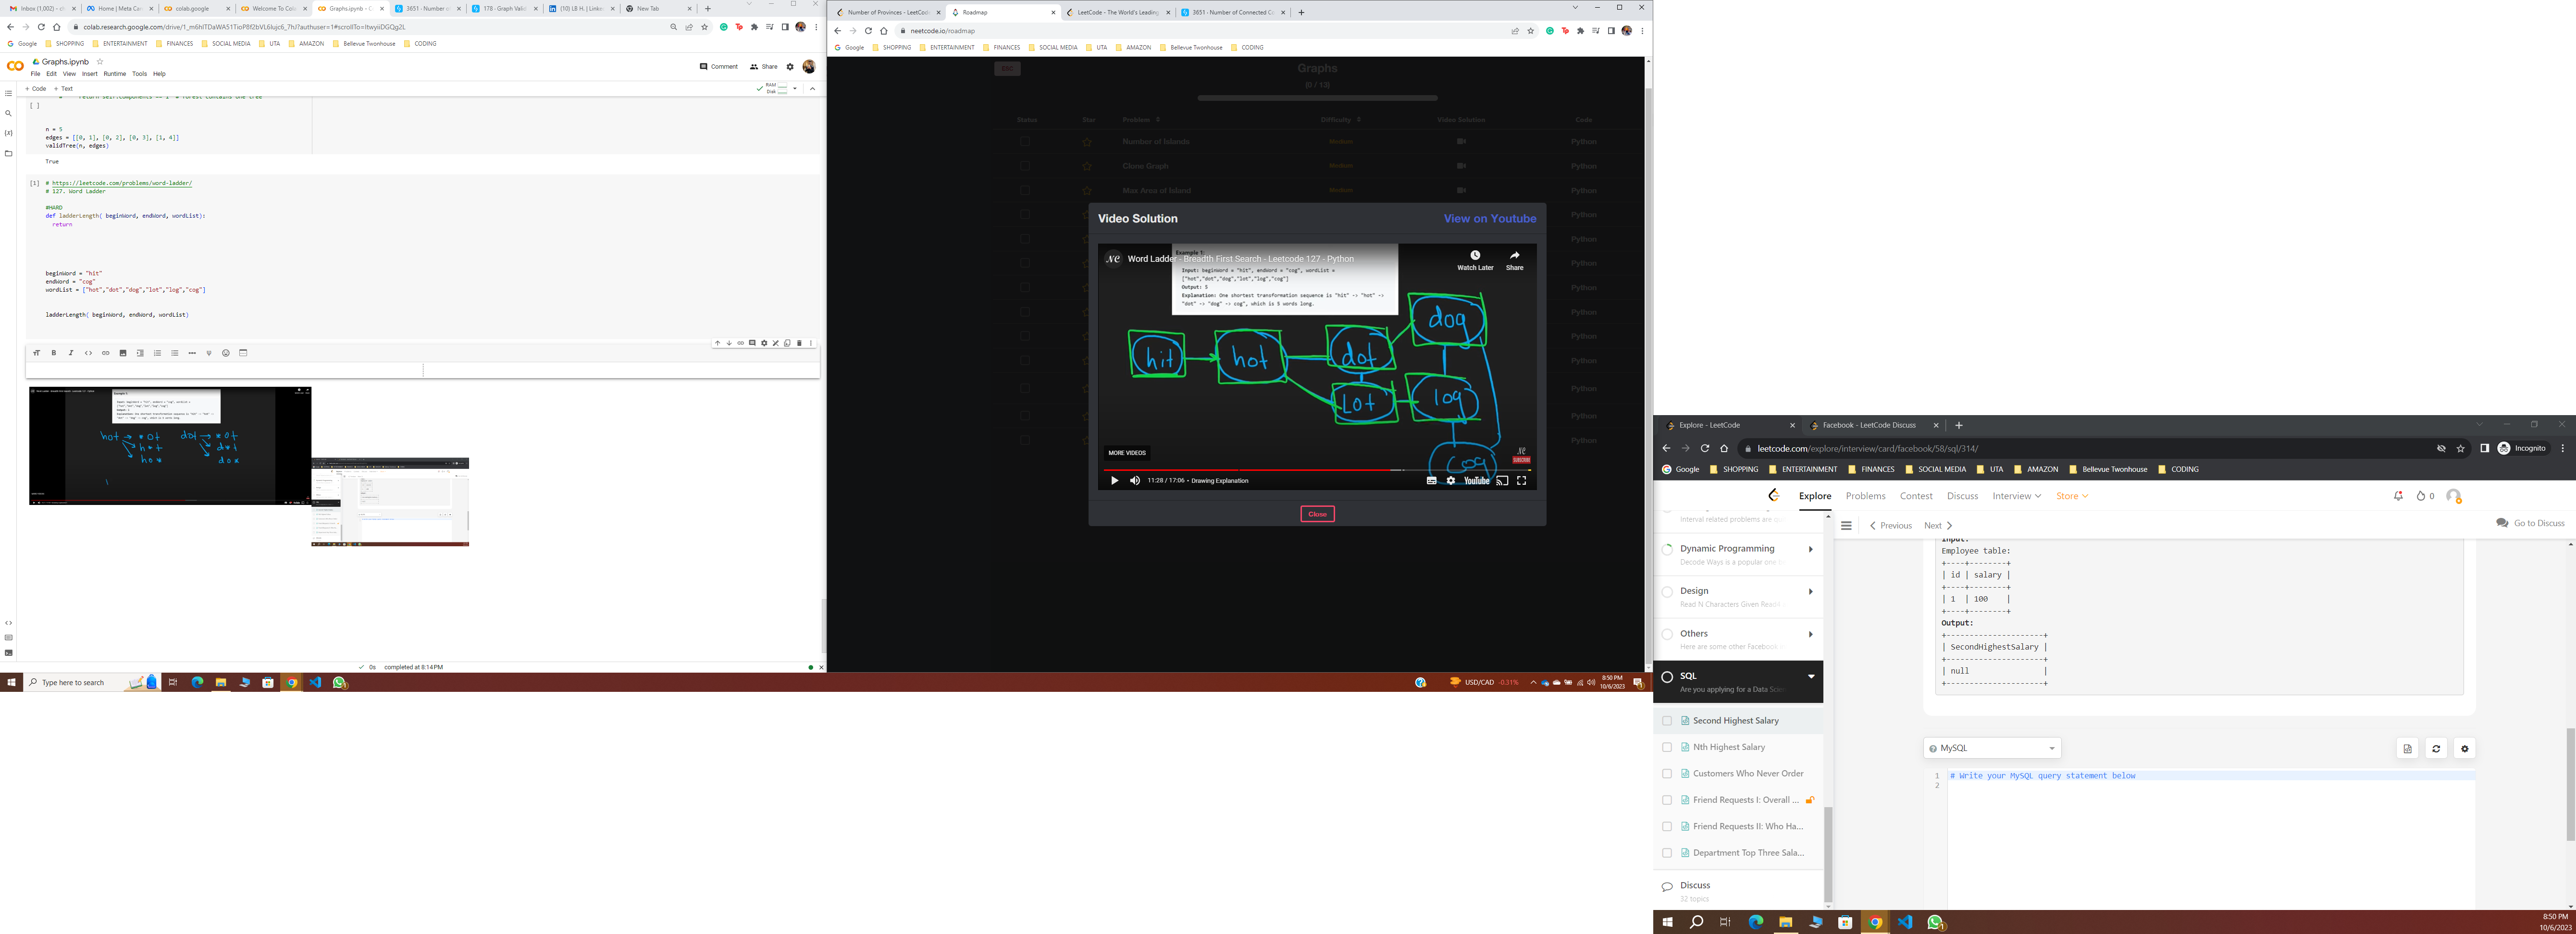

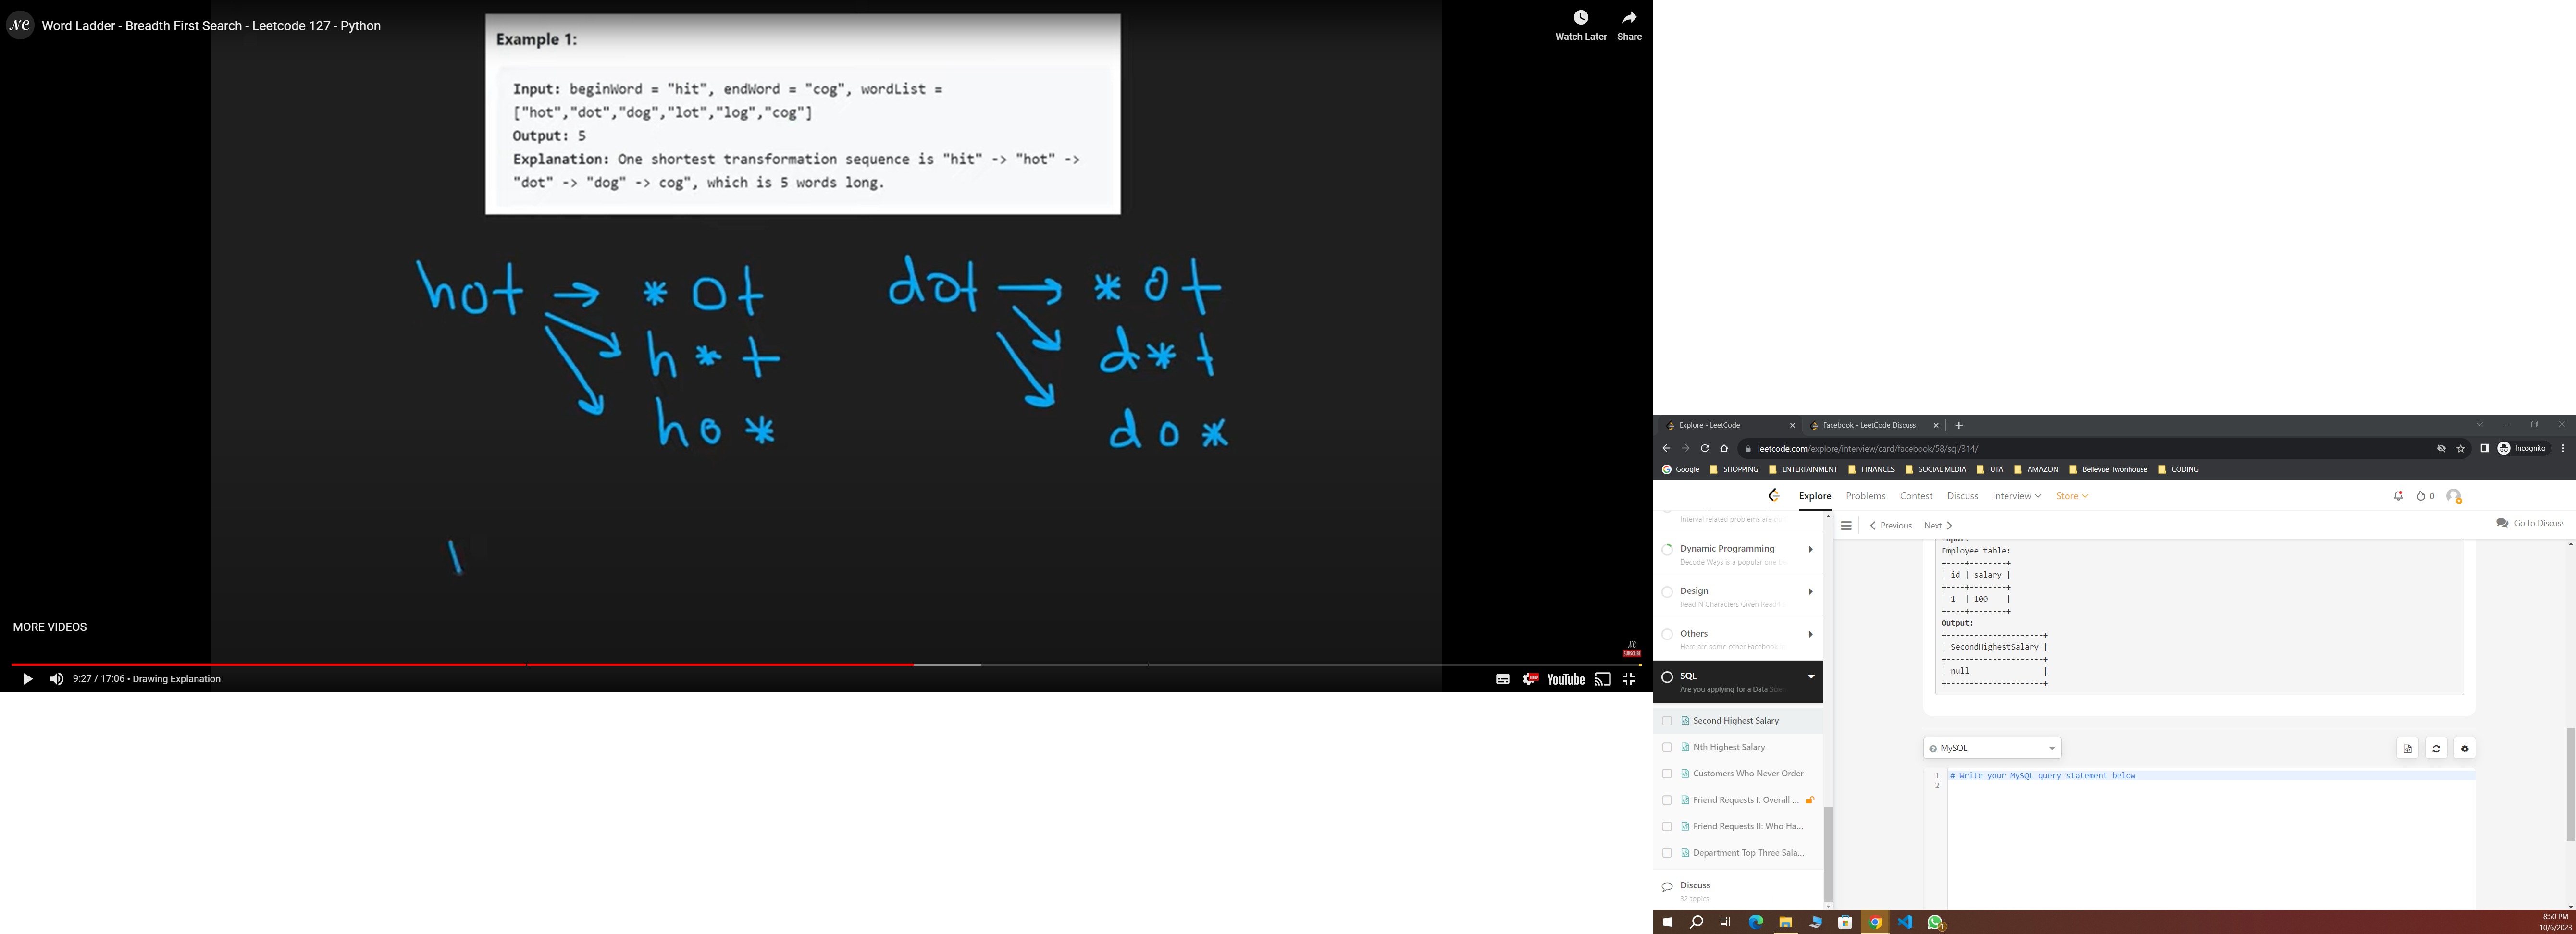

In [ ]:
# https://leetcode.com/problems/alien-dictionary/description/
# 269. Alien Dictionary
#HARD

def alienOrder(words):
  # create a adjaceny list of all the char in the words
        adj = {char: set() for word in words for char in word}
# compare two words ata atime
        for i in range(len(words) - 1):
            w1, w2 = words[i], words[i + 1]
            # find minlength to find smaller word
            minLen = min(len(w1), len(w2))
            # edgs case given, if apes and ape, then return ""
            if len(w1) > len(w2) and w1[:minLen] == w2[:minLen]:
                return ""
                # go through min length
            for j in range(minLen):
              # find first different char
                if w1[j] != w2[j]:
                    print(w1[j], w2[j])
                    # add to adjaceny list
                    # where key is fir char, value is the char after the key char
                    # basically t comes before f
                    adj[w1[j]].add(w2[j])
                    # break after first occurence
                    break
# dict if we visit the char, then first false,if in current path, then true
        visited = {}  # {char: bool} False visited, True current path
        res = []

        def dfs(char):
          # if achar already in dict
          # return true or false
          # if true is detected here, then we know we have a loop
            if char in visited:
                return visited[char]
# make the true as the char is in the current path
            visited[char] = True
# go through eaach neighbour of the current char
            for neighChar in adj[char]:
              # if we have a loop, this will return true
                if dfs(neighChar):
                    return True
# after visiting, we make false as this wiont be the current char
            visited[char] = False
            # we append the last char first
            res.append(char)
            print(res)
# if we detect a loop, then return ""
        for char in adj:
            if dfs(char):
                return ""
# as in reverse order,
        res.reverse()
        # join using the ""
        return "".join(res)
# O(n) where n is the number of chars in total
# o(n)

words = ["wrt","wrf","er","ett","rftt"]
alienOrder(words)

t f
w e
r t
e r
['f']
['f', 't']
['f', 't', 'r']
['f', 't', 'r', 'e']
['f', 't', 'r', 'e', 'w']


'wertf'

In [ ]:
# https://leetcode.com/problems/verifying-an-alien-dictionary/
# 953. Verifying an Alien Dictionary

# for j, we check if the word leng is qual to word2, that means word 2 is smaller than word 1, then we return false
#  as smaller word should always be first and then the larger word

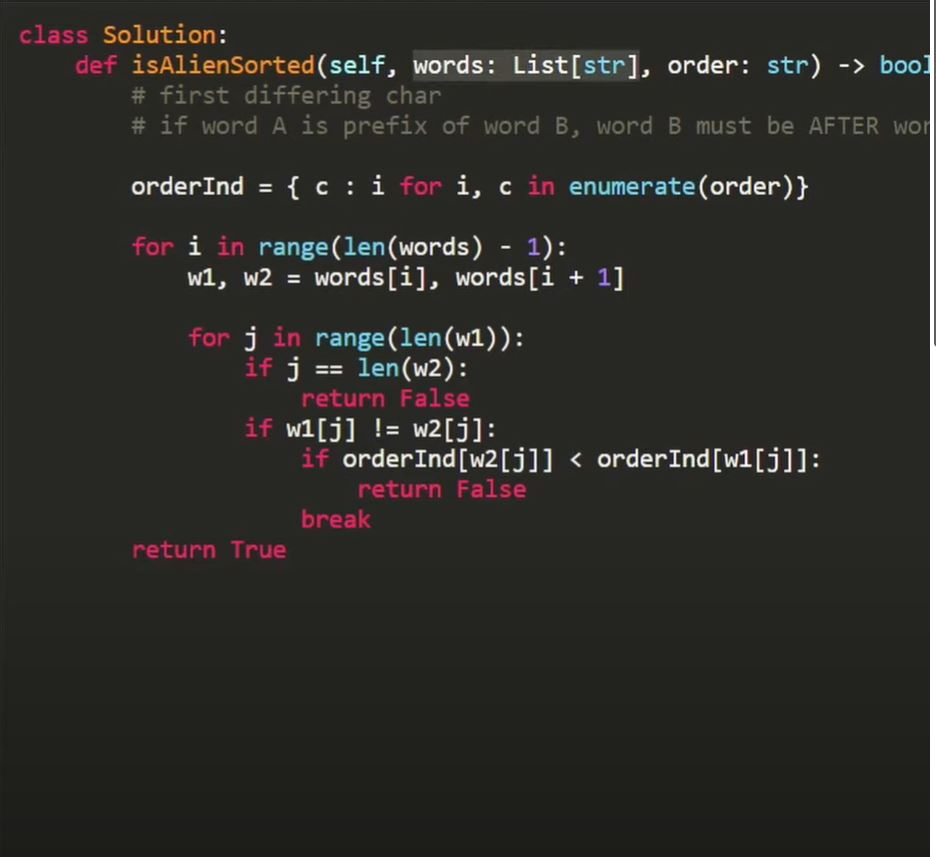

In [ ]:
# https://leetcode.com/problems/shortest-distance-from-all-buildings/description/
#hard

# SO BASICALY HAVE ANother matrix to keep calculating distance fro the building
# perform dfs from the buildings updating the distance matyrix
# update the min distance for each distance
# updatemin dist after each bfs


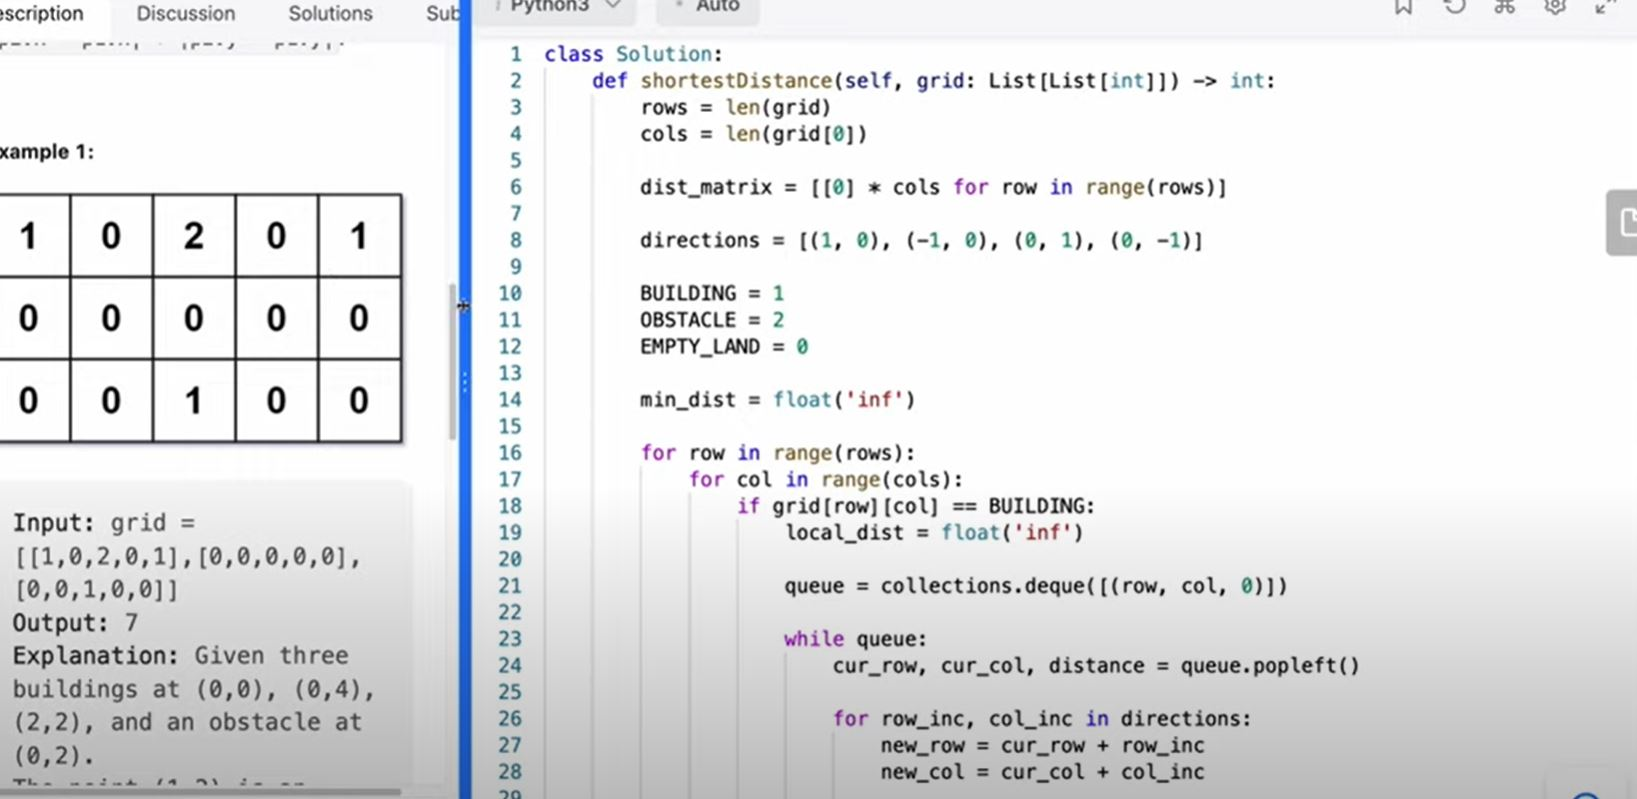

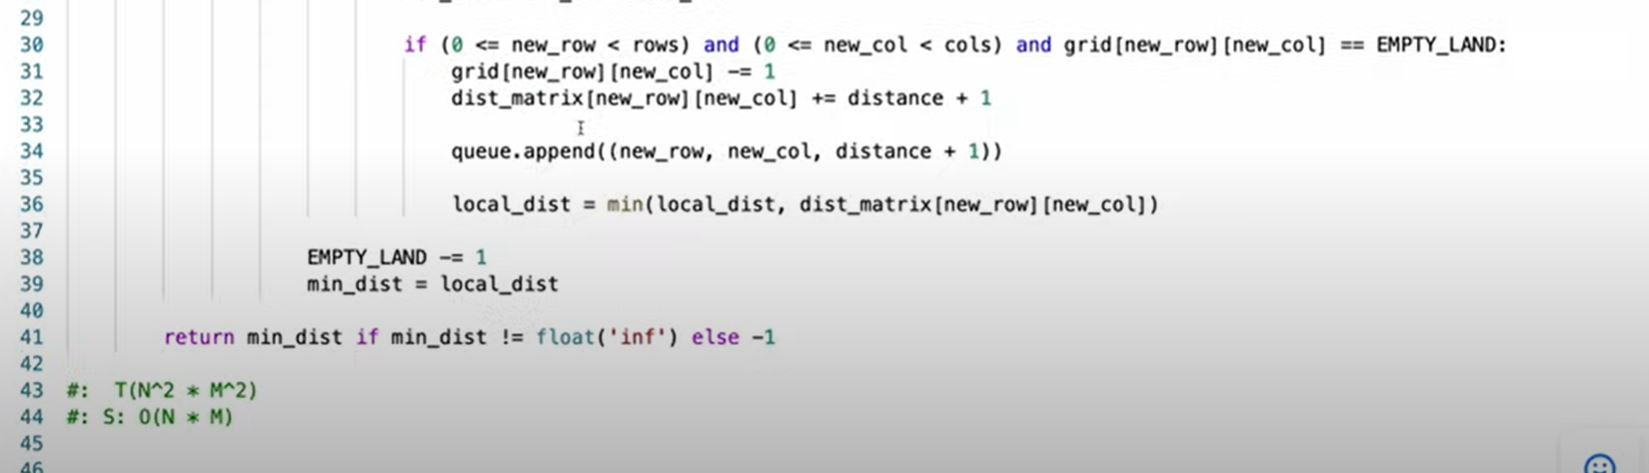

In [ ]:
# https://leetcode.com/problems/accounts-merge/description/
# 721. Accounts Merge
# Medium

# https://www.youtube.com/watch?v=6st4IxEF-90


# use the union find
# first go through the accounts litst getting the indexes
# iterating through the email part of the account, we add the email as key to value as the account index
# if email is already in the dict, thatmeans awe have same owner, then weee perform union, make one of the account as the leader of the other account

# secoind dict is for email groups
# now iterate trhough all the emails and its index owners
# find leader of tthat account index using find and add the emails to that group
# havinbg the leader as the ley and values as emnails

# then we create a result set
# iterate through the email group dict
# name will be first string and sorted will be emails in the emails list


#o(mlogn) m is the times union and find and n is the number of emails
#o(n)


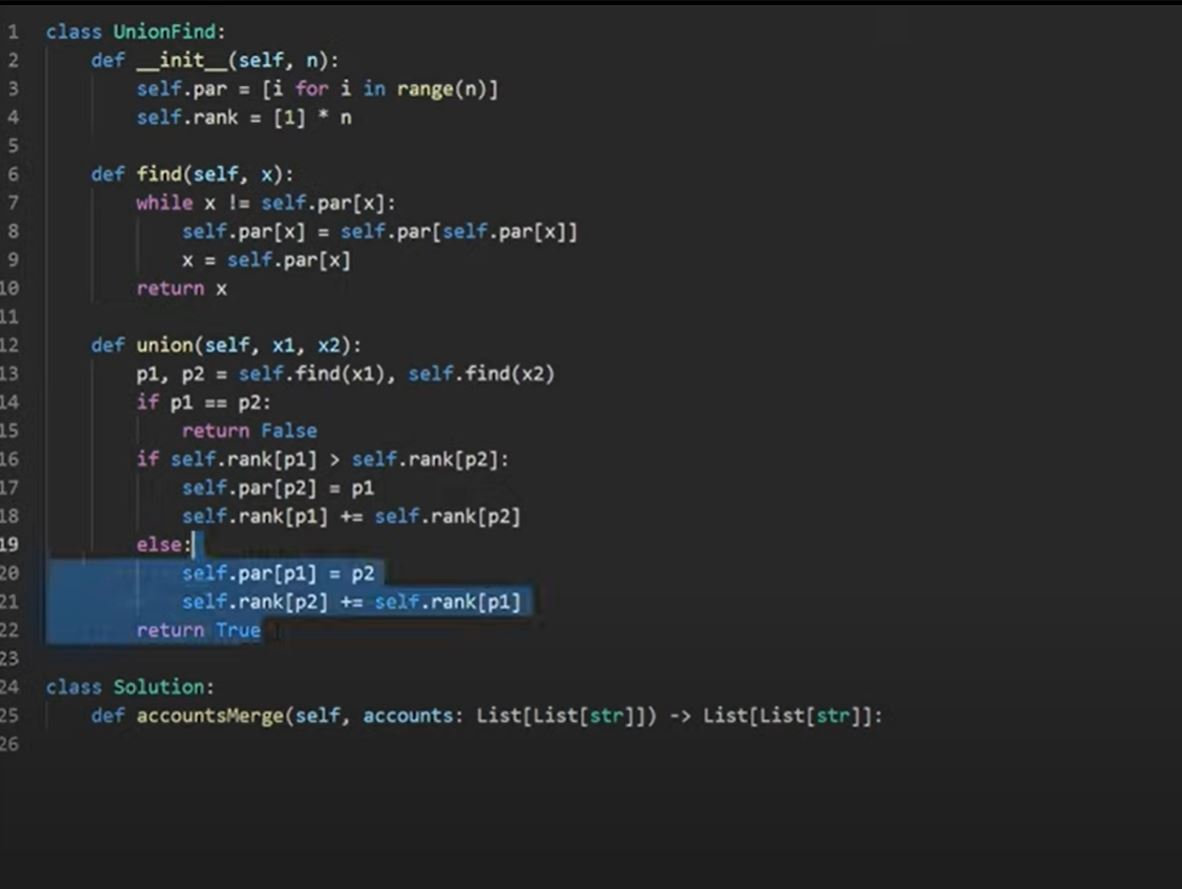

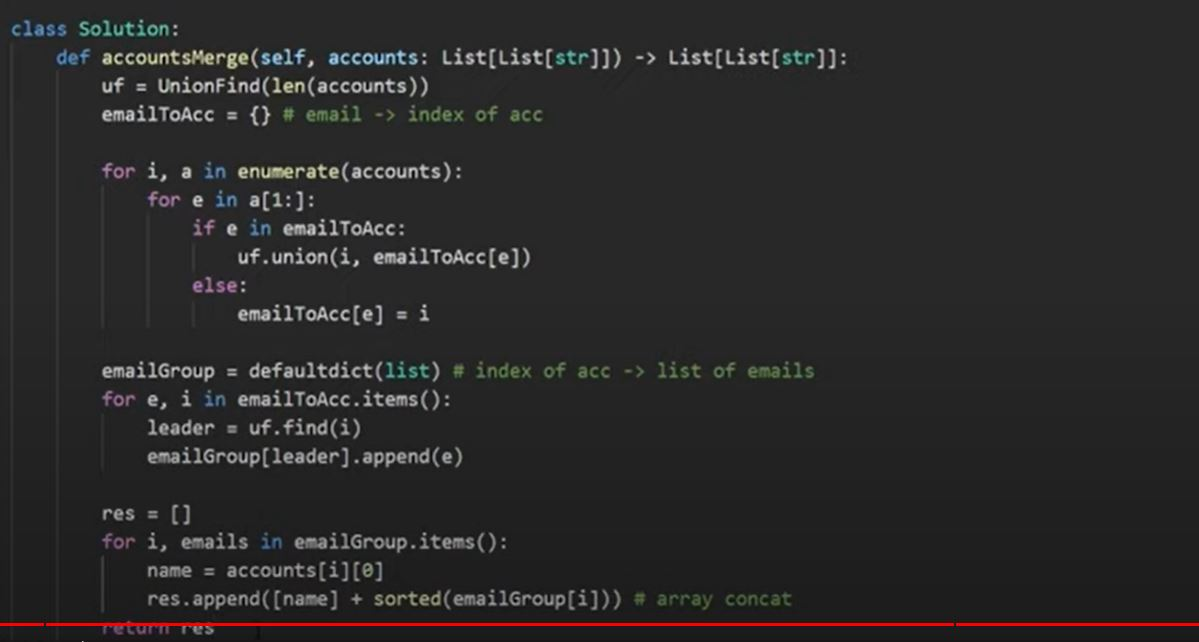

In [ ]:

# https://leetcode.com/problems/is-graph-bipartite/editorial/
from collections import deque

def isBipartite(graph):
  # initialize array of length graph representing each node in the graph
  # odd 1, even 1
        odd = [0] * len(graph)

        def bfs(i):
          # if there is a value fo rthat node, then return True as default as we inily don't lnow if the graph is bipartite
            if odd[i]:
                return True
                # add that i to queue
            q = deque([i])
            odd[i] = -1
            print(q, odd)
            while q:
              # pop i
                i = q.popleft()
                print(q,odd,i)

                # run bfs for all its neighbours
                for nei in graph[i]:
                  # if we are visiting i and i has neigh
                  # we visit the neighbour, set it to odd
                  # at this point the value of i and neighbour will be the same
                  # that means we have a cycle
                  # so no bipartite
                    if odd[i] == odd[nei]:
                        return False
                      # else if visiting for the first time
                      # we skip already visited nbodes here
                    elif not odd[nei]:
                      # add to the queue
                        q.append(nei)
                        # make the value opposite of wehat it is
                        # basically making even value of the nie
                        odd[nei] = -1*odd[i]
            return True
        # do that for all the points in the graphs
        for i in range(len(graph)):
            print(i)
            if not bfs(i):
                return False
        return True

       # o(e+v)     o(n)


graph = [[1,2,3],[0,2],[0,1,3],[0,2]]
# graph = [[1,3],[0,2],[1,3],[0,2]]
isBipartite(graph)

0
deque([0]) [-1, 0, 0, 0]
deque([]) [-1, 0, 0, 0] 0
deque([2, 3]) [-1, 1, 1, 1] 1


False

A Bipartite Graph is a graph whose vertices can be divided into two independent sets, U and V such that every edge (u, v) either connects a vertex from U to V or a vertex from V to U. In other words, for every edge (u, v), either u belongs to U and v to V, or u belongs to V and v to U. We can also say that there is no edge that connects vertices of same set.

Bipartite1

https://media.geeksforgeeks.org/wp-content/uploads/bipartitegraph-1.jpg
